In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random

# Helper Functions

In [2]:
map = {}

def f(x1,x2,x3,w1,w2,w3):
    return 1 if (w1*x1 + w2*x2 + w3*x3) >= 0 else -1

def update_weights(x1,x2,x3,y,w1,w2,w3):
    delta = y
    W1 = w1 + delta*x1
    W2 = w2 + delta*x2
    W3 = w3 + delta*x3
    return W1,W2,W3

def draw_decision_boundary(x,y,w1,w2,w3): 
    i=0
    x_pos = []
    x_neg = []
    while(i<np.size(y)):
        if(y[i]>0):
            x_pos.append(x[i])
        else:
            x_neg.append(x[i])
        i+=1
    x_pos_np = np.array(x_pos)
    x_neg_np = np.array(x_neg)
    plt.scatter(x_neg_np[:,0],x_neg_np[:,1], c = 'red', marker = 'x')
    plt.scatter(x_pos_np[:,0],x_pos_np[:,1], c = 'blue', marker = '+')
    
    if(w1==0 and w2==0):
        return
    elif(w2 == 0):
        x_val=-w3/w1
        plt.axvline(x = x_val)
    else:
        slope = -w1/w2  
        intercept = -w3/w2
        
        axes = plt.gca()
        x_vals = np.array(axes.get_xlim())
        y_vals = intercept + slope * x_vals
        plt.plot(x_vals, y_vals)
    plt.show()

def detect_cycle(w1,w2,w3):
    key= str(w1)+str(w2)+str(w3)
    if(key in map):
        return True
    else:
        map[key] = 1
        return False
    
def PTA(X,Y):
    i = 0
    flag = 0
    iter = 0
    random.seed(42)
    w1 = random.randint(1,4) #Weight 1
    w2 = random.randint(1,4) #Weight 2
    w3 = random.randint(-3,3) #Bias
    s = str(w1) + str(w2) + str(w3)
    map[s] = 1
    print("Initial weights ", w1,w2,w3)
    while(i<np.size(Y)):
        x1 = X[i][0]
        x2 = X[i][1]
        x3 = 1
        print(x1,x2,x3)
        y = Y[i]
        y_pred = f(x1,x2,x3,w1,w2,w3)
        print(y,y_pred)
        print("Old weights ",w1,w2,w3)
        if(y == y_pred):
            #check for all previous
            if(flag == 1):
                i=0
                flag = 0
            else:
                i+=1
        else:
            w1,w2,w3 = update_weights(x1,x2,x3,y,w1,w2,w3)
            iter+=1
            print(w1,w2,w3)
            if(detect_cycle(w1,w2,w3)):
                print("Cycle detected in weights in ",iter," steps excluding initiation")
                break
            draw_decision_boundary(X,Y,w1,w2,w3)
            flag = 1
        print('===============')
    map.clear()
    return [iter,[w1,w2,w3]]
        

# PTA for AND

Initial weights  1 1 2
0 0 1
-1 1
Old weights  1 1 2
1 1 1


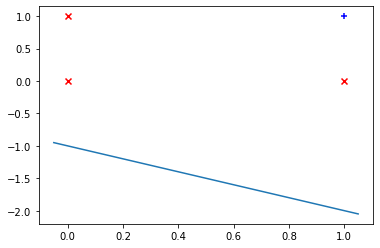

0 0 1
-1 1
Old weights  1 1 1
1 1 0


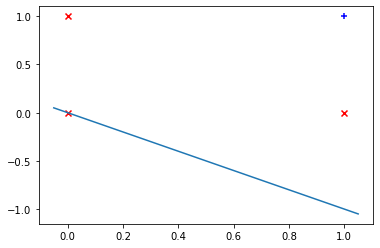

0 0 1
-1 1
Old weights  1 1 0
1 1 -1


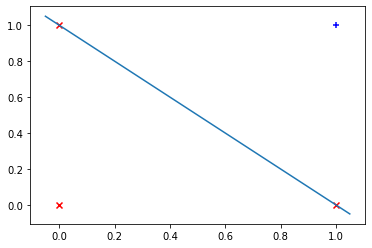

0 0 1
-1 -1
Old weights  1 1 -1
0 0 1
-1 -1
Old weights  1 1 -1
0 1 1
-1 1
Old weights  1 1 -1
1 0 -2


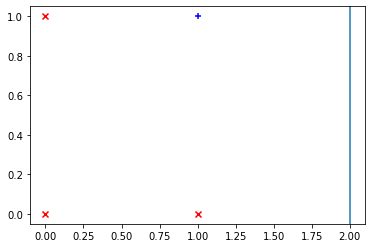

0 1 1
-1 -1
Old weights  1 0 -2
0 0 1
-1 -1
Old weights  1 0 -2
0 1 1
-1 -1
Old weights  1 0 -2
1 0 1
-1 -1
Old weights  1 0 -2
1 1 1
1 -1
Old weights  1 0 -2
2 1 -1


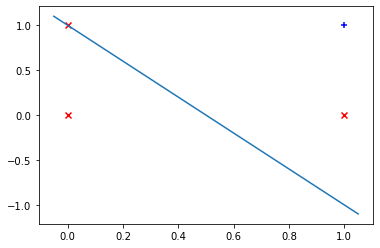

1 1 1
1 1
Old weights  2 1 -1
0 0 1
-1 -1
Old weights  2 1 -1
0 1 1
-1 1
Old weights  2 1 -1
2 0 -2


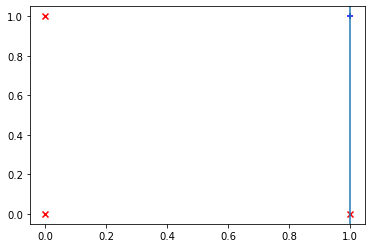

0 1 1
-1 -1
Old weights  2 0 -2
0 0 1
-1 -1
Old weights  2 0 -2
0 1 1
-1 -1
Old weights  2 0 -2
1 0 1
-1 1
Old weights  2 0 -2
1 0 -3


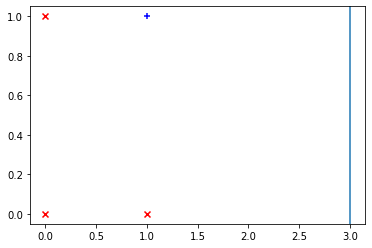

1 0 1
-1 -1
Old weights  1 0 -3
0 0 1
-1 -1
Old weights  1 0 -3
0 1 1
-1 -1
Old weights  1 0 -3
1 0 1
-1 -1
Old weights  1 0 -3
1 1 1
1 -1
Old weights  1 0 -3
2 1 -2


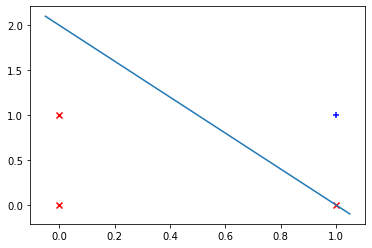

1 1 1
1 1
Old weights  2 1 -2
0 0 1
-1 -1
Old weights  2 1 -2
0 1 1
-1 -1
Old weights  2 1 -2
1 0 1
-1 1
Old weights  2 1 -2
1 1 -3


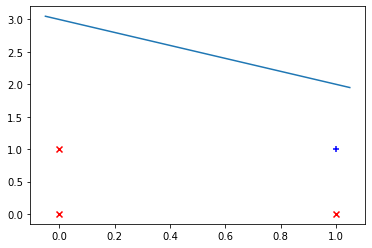

1 0 1
-1 -1
Old weights  1 1 -3
0 0 1
-1 -1
Old weights  1 1 -3
0 1 1
-1 -1
Old weights  1 1 -3
1 0 1
-1 -1
Old weights  1 1 -3
1 1 1
1 -1
Old weights  1 1 -3
2 2 -2


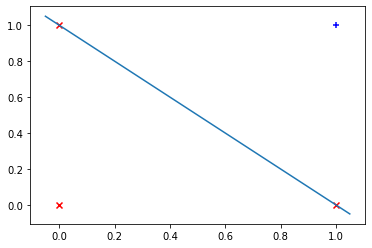

1 1 1
1 1
Old weights  2 2 -2
0 0 1
-1 -1
Old weights  2 2 -2
0 1 1
-1 1
Old weights  2 2 -2
2 1 -3


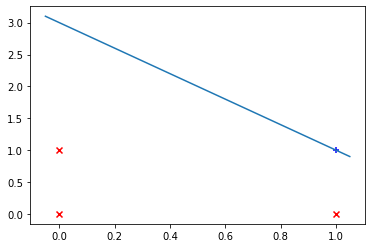

0 1 1
-1 -1
Old weights  2 1 -3
0 0 1
-1 -1
Old weights  2 1 -3
0 1 1
-1 -1
Old weights  2 1 -3
1 0 1
-1 -1
Old weights  2 1 -3
1 1 1
1 1
Old weights  2 1 -3
Converged in  11  steps(weight updates)
Final weights:  [2, 1, -3]


In [3]:
ANDx = np.array([[0,0],[0,1],[1,0],[1,1]])
ANDy = np.array([-1,-1,-1,1])
iter, weights = PTA(ANDx,ANDy)
print('Converged in ',iter,' steps(weight updates)')
print('Final weights: ',weights)


# PTA for OR

Initial weights  1 1 2
0 0 1
-1 1
Old weights  1 1 2
1 1 1


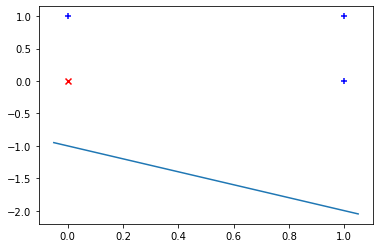

0 0 1
-1 1
Old weights  1 1 1
1 1 0


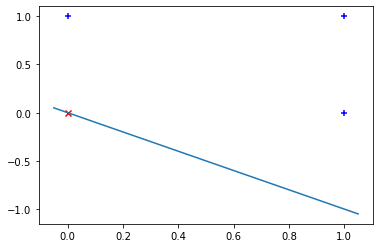

0 0 1
-1 1
Old weights  1 1 0
1 1 -1


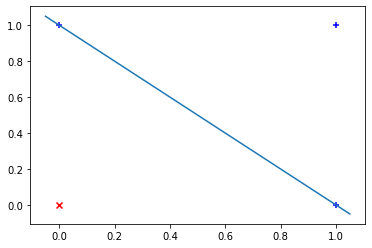

0 0 1
-1 -1
Old weights  1 1 -1
0 0 1
-1 -1
Old weights  1 1 -1
0 1 1
1 1
Old weights  1 1 -1
1 0 1
1 1
Old weights  1 1 -1
1 1 1
1 1
Old weights  1 1 -1
Converged in  3  steps(weight updates)
Final weights:  [1, 1, -1]


In [4]:
ORx = np.array([[0,0],[0,1],[1,0],[1,1]])
ORy = np.array([-1,1,1,1])
iter, weights = PTA(ORx,ORy)
print('Converged in ',iter,' steps(weight updates)')
print('Final weights: ',weights)


# PTA for NOT

Initial weights  1 1 2
0 0 1
1 1
Old weights  1 1 2
1 0 1
-1 1
Old weights  1 1 2
0 1 1


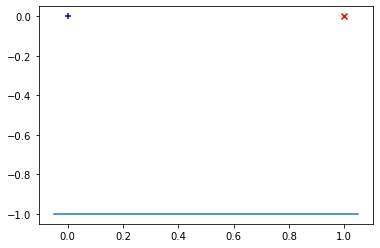

1 0 1
-1 1
Old weights  0 1 1
-1 1 0


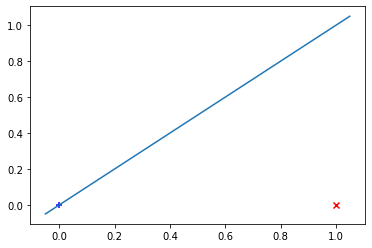

1 0 1
-1 -1
Old weights  -1 1 0
0 0 1
1 1
Old weights  -1 1 0
1 0 1
-1 -1
Old weights  -1 1 0
Converged in  2  steps(weight updates)
Final weights:  -1 0


In [5]:
#Second input disabled. W2 doesn't contribute
NOTx = np.array([[0,0],[1,0]])
NOTy = np.array([1,-1])
iter, weights = PTA(NOTx,NOTy)
print('Converged in ',iter,' steps(weight updates)')
print('Final weights: ',weights[0],weights[2])

# PTA for XOR

Initial weights  1 1 2
0 0 1
-1 1
Old weights  1 1 2
1 1 1


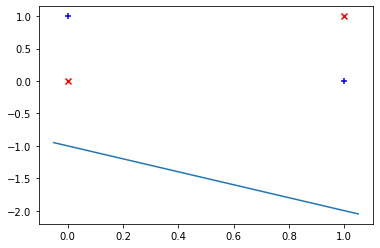

0 0 1
-1 1
Old weights  1 1 1
1 1 0


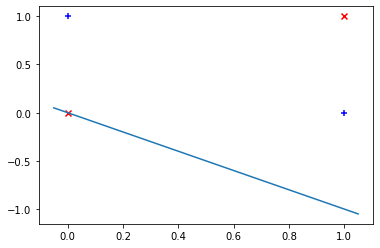

0 0 1
-1 1
Old weights  1 1 0
1 1 -1


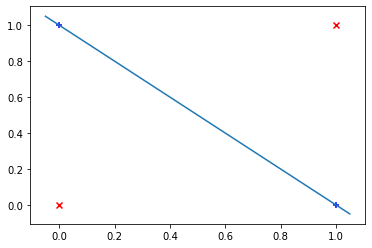

0 0 1
-1 -1
Old weights  1 1 -1
0 0 1
-1 -1
Old weights  1 1 -1
0 1 1
1 1
Old weights  1 1 -1
1 0 1
1 1
Old weights  1 1 -1
1 1 1
-1 1
Old weights  1 1 -1
0 0 -2
1 1 1
-1 -1
Old weights  0 0 -2
0 0 1
-1 -1
Old weights  0 0 -2
0 1 1
1 -1
Old weights  0 0 -2
0 1 -1


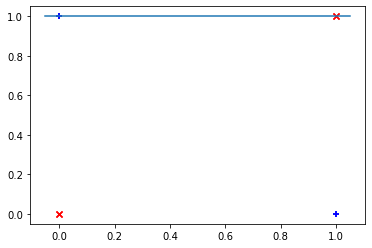

0 1 1
1 1
Old weights  0 1 -1
0 0 1
-1 -1
Old weights  0 1 -1
0 1 1
1 1
Old weights  0 1 -1
1 0 1
1 -1
Old weights  0 1 -1
1 1 0
Cycle detected in weights in  6  steps excluding initiation


In [6]:
XORx = np.array([[0,0],[0,1],[1,0],[1,1]])
XORy = np.array([-1,1,1,-1])
iter, weights = PTA(XORx,XORy)